In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

from PIL import Image
from pathlib import Path

main_path=Path(os.getcwd()).parent
data_dir=os.path.join(main_path, 'data', 'train')

matplotlib.rcParams.update({'font.size':8})

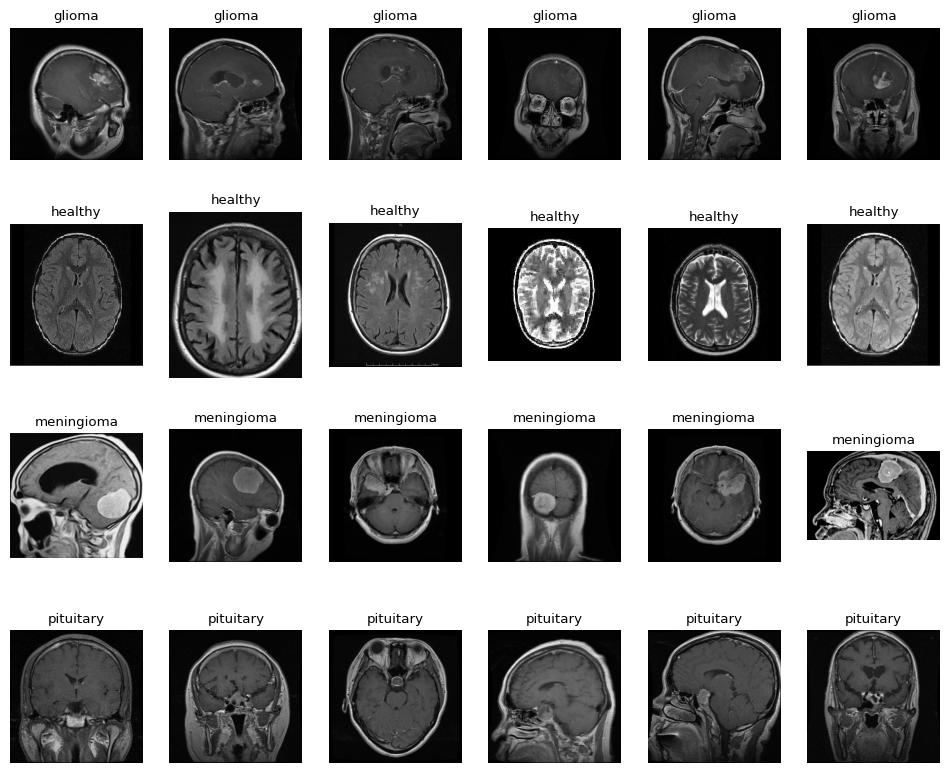

In [57]:
def plot_some_images(path, n_images_per_class):
    categories=os.listdir(path)
    fig,axis=plt.subplots(4, n_images_per_class, figsize=(n_images_per_class*2,10))

    for row, category in enumerate(categories):
        for col, example in enumerate(np.random.choice(os.listdir(os.path.join(data_dir, category)), size=n_images_per_class)):
            axis[row,col].imshow(np.array(Image.open(os.path.join(path, category, example))))
            axis[row,col].set_title(category)
            axis[row,col].axis('off')

    plt.show()

    
plot_some_images(data_dir, 6)

In [36]:
from tensorflow import keras

train_ds=keras.utils.image_dataset_from_directory(data_dir,
                                         image_size=(512, 512))

Found 5617 files belonging to 4 classes.


In [60]:
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
model.fit(train_ds, epochs=3)

Epoch 1/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 164s 918ms/step - accuracy: 0.5094 - loss: 11883.9082
Epoch 2/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 160s 906ms/step - accuracy: 0.6838 - loss: 915.4537
Epoch 3/3
176/176 ━━━━━━━━━━━━━━━━━━━━ 155s 883ms/step - accuracy: 0.7497 - loss: 646.7573


In [66]:
import tensorflow as tf

In [83]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [84]:
train_ds.batch(32).map(lambda x,y: x, y)

NameError: name 'y' is not defined

In [91]:
an_image=train_ds.take(1)
an_image

<_TakeDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [97]:
train_ds.map(lambda x: x[1])

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.<lambda>() takes 1 positional argument but 2 were given


In [100]:
img = Image.open(r'C:\Users\ernes\Documents\ML Projects\brain_cancer\data\val\glioma\0002.jpg')